In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, precision_score, recall_score, accuracy_score, f1_score

import tensorflow as tf

np.random.seed(1)

2022-12-31 12:00:41.319991: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-31 12:00:42.863883: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-31 12:00:42.864033: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-31 12:00:42.990383: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-12-31 12:00:45.239509: W tensorflow/stream_executor/platform/de

In [2]:
# read data
df = pd.read_csv('../../data/poverty_census_data.csv')
df.describe()

,SSL SCORE,PREDICTOR RAT VICTIM SHOOTING INCIDENTS,PREDICTOR RAT VICTIM BATTERY OR ASSAULT,PREDICTOR RAT ARRESTS VIOLENT OFFENSES,PREDICTOR RAT GANG AFFILIATION,PREDICTOR RAT NARCOTIC ARRESTS,PREDICTOR RAT TREND IN CRIMINAL ACTIVITY,PREDICTOR RAT UUW ARRESTS,PREDICTOR RAT AGE AT LATEST ARREST_20-30,PREDICTOR RAT AGE AT LATEST ARREST_30-40,PREDICTOR RAT AGE AT LATEST ARREST_40-50,PREDICTOR RAT AGE AT LATEST ARREST_50-60,PREDICTOR RAT AGE AT LATEST ARREST_60-70,PREDICTOR RAT AGE AT LATEST ARREST_70-80,PREDICTOR RAT AGE AT LATEST ARREST_less than 20,Poverty_Rate
count,223839.000000,223839.000000,223839.000000,223839.000000,223839.000000,223839.000000,223839.000000,223839.000000,223839.000000,223839.000000,223839.000000,223839.000000,223839.000000,223839.000000,223839.000000,223839.000000
mean,0.722957,0.032573,0.056357,0.156005,0.258463,0.481784,-0.067300,0.047297,0.342930,0.209338,0.145421,0.094599,0.020327,0.002225,0.185160,29.924888
std,0.447539,0.193414,0.262757,0.468660,0.437790,1.005172,0.447049,0.228805,0.474689,0.406837,0.352526,0.292661,0.141117,0.047116,0.388428,14.925837
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.217865
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.720047
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.943850
75%,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.200000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.584362
max,1.000000,4.000000,10.000000,12.000000,1.000000,27.000000,7.300000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000


In [3]:
# Labels are the values we want to predict
labels = np.array(df['SSL SCORE']) # Y
df = df.drop('SSL SCORE', axis = 1)
x_list = list(df.columns) # X
# Convert to numpy array
df = np.array(df)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size = 0.25, random_state = 42)

# Neural Network

In [5]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

2022-12-31 12:00:47.765798: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-31 12:00:47.766131: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-31 12:00:47.766262: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-NCRIRMG): /proc/driver/nvidia/version does not exist
2022-12-31 12:00:47.768167: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
predictions = model(X_train[:1]).numpy()
predictions

array([[-2.7098732 , -1.2165697 ,  2.2554455 , -1.1691647 , -4.2939043 ,
         1.1561313 ,  2.3447304 , -2.4405556 , -0.66612023,  4.025527  ]],
      dtype=float32)

In [7]:
tf.nn.softmax(predictions).numpy()

array([[8.27210897e-04, 3.68255866e-03, 1.18584186e-01, 3.86133511e-03,
        1.69699400e-04, 3.95003259e-02, 1.29659012e-01, 1.08287774e-03,
        6.38567749e-03, 6.96247101e-01]], dtype=float32)

In [8]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [9]:
loss_fn(y_train[:1], predictions).numpy()

5.6041474

In [10]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [11]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
5247/5247 [==============================] - 17s 3ms/step - loss: 0.1252 - accuracy: 0.9564
Epoch 2/5
5247/5247 [==============================] - 14s 3ms/step - loss: 0.0843 - accuracy: 0.9689
Epoch 3/5
5247/5247 [==============================] - 12s 2ms/step - loss: 0.0835 - accuracy: 0.9692
Epoch 4/5
5247/5247 [==============================] - 11s 2ms/step - loss: 0.0829 - accuracy: 0.9690
Epoch 5/5
5247/5247 [==============================] - 11s 2ms/step - loss: 0.0822 - accuracy: 0.9694


In [12]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

1749/1749 [==============================] - 3s 2ms/step


In [13]:
print(y_test.shape, y_pred.shape)

(55960,) (55960,)


Text(0.5, 427.9555555555555, 'Predicted label')

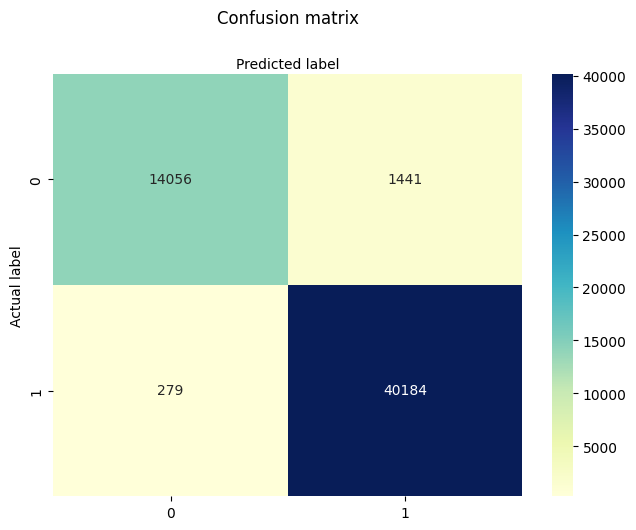

In [14]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [15]:
target_names = ['LOW SSL SCORE', 'HIGH SSL SCORE']
print(classification_report(y_test, y_pred, target_names=target_names))

                precision    recall  f1-score   support

 LOW SSL SCORE       0.98      0.91      0.94     15497
HIGH SSL SCORE       0.97      0.99      0.98     40463

      accuracy                           0.97     55960
     macro avg       0.97      0.95      0.96     55960
  weighted avg       0.97      0.97      0.97     55960



In [16]:
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))
print('Precision: %.4f' % precision_score(y_test, y_pred))
print('Recall: %.4f' % recall_score(y_test, y_pred))
print('F1 Score: %.4f' % f1_score(y_test, y_pred))

Accuracy: 0.9693
Precision: 0.9654
Recall: 0.9931
F1 Score: 0.9790
